In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from pyrates import OperatorTemplate, NodeTemplate, CircuitTemplate, clear

%matplotlib inline

In [16]:
# define QIF operator with conductance-based synapses
eqs = [
    "w1' = i*(eta + I_ext - w1^2 - i*Delta - J*tau*s)/tau",
    "w2' = -Delta - i*2*w1*w2",
    "s' = real(w1 + w2)/(pi*tau) - s/tau_s "
]
variables = {
    "w1": "variable(complex)",
    "w2": "variable(0.0+0j)",
    "s": "output(0.0)",
    "Delta": 1.0,
    "tau": 1.0,
    "eta": -5.0,
    "tau_s": 1.0,
    "J": 15.0,
    "i": 0+1j,
    "I_ext": "input(0.0)"
}
op = OperatorTemplate(name="qif_c", equations=eqs, variables=variables, path=None)

# define QIF node
node = NodeTemplate(name="qif_node", operators=[op], path=None)

# define QIF model
qif = CircuitTemplate(name="qif", nodes={"p": node}, edges=[], path=None)

In [17]:
# simulation parameters
T = 100.0
T_on = 30.0
T_off = 60.0
dt = 1e-4
dts = 1e-2

# input definition
steps = int(np.round(T/dt))
start = int(np.round(T_on/dt))
stop = int(np.round(T_off/dt))
inp = np.zeros((steps,))
inp[start:stop] = 3.0

# perform simulation
res = qif.run(simulation_time=T, step_size=dt, sampling_step_size=dts, solver="scipy", method="RK23",
              outputs={"s": "p/qif_c/s"}, inputs={"p/qif_c/I_ext": inp})
clear(qif)

Compilation Progress
--------------------
	(1) Translating the circuit template into a networkx graph representation...
		...finished.
	(2) Preprocessing edge transmission operations...
		...finished.
	(3) Parsing the model equations into a compute graph...
		...finished.
	Model compilation was finished.
Simulation Progress
-------------------
	 (1) Generating the network run function...
	 (2) Processing output variables...
		...finished.
	 (3) Running the simulation...


/home/rgast/PycharmProjects/PyRates/pyrates/backend/computegraph.py:89: ComplexWarning: Casting complex values to real discards the imaginary part
  self._value = np.asarray(v, dtype=self.dtype)


		...finished after 1.1702873220019683s.


/home/rgast/Software/anaconda3/envs/ds/lib/python3.8/site-packages/matplotlib-3.5.1-py3.8-linux-x86_64.egg/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


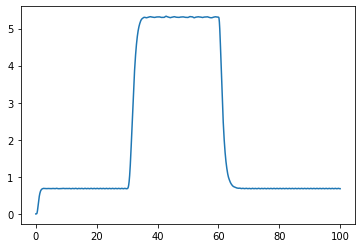

In [18]:
plt.plot(res*1e3)